In [1]:
import pandas as pd
from plotnine import *
import plotnine
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import sparse

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity

In [2]:
music_data = pd.read_csv('../data/final_merged.csv')

In [3]:
music_data['Values'] = music_data['Values'].str.replace(' ', '_')
music_data['Values'] = music_data['Values'].str.replace(',_', ', ')


In [4]:
music_data['Values'] = music_data['Values'].apply(eval)

In [5]:
music_data['Values']

0                                       [australian_dance]
1                                       [australian_dance]
2                                       [australian_dance]
3                                       [australian_dance]
4                                       [australian_dance]
                               ...                        
41445    [canadian_electronic, edm, electro_house, futu...
41446    [canadian_electronic, edm, electro_house, futu...
41447    [canadian_electronic, edm, electro_house, futu...
41448    [canadian_electronic, edm, electro_house, futu...
41449    [canadian_electronic, edm, electro_house, futu...
Name: Values, Length: 41450, dtype: object

In [39]:
music_data.tail()

,release_date,artist,name,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,popularity_cat_2,popularity_cat_3,popularity_cat_4,popularity_cat_5,popularity_cat_6,popularity_cat_7,popularity_cat_8,popularity_cat_9,popularity_cat_10,year cos
41445,2020-05-22,Conro,Tattoo,Level Days,0.663,0.802,-7.649,0.0566,0.04420,0.091100,...,0,1,0,0,0,0,0,0,0,-0.764231
41446,2020-05-22,Conro,Out for the Night,Level Days,0.740,0.775,-7.067,0.0567,0.00697,0.075700,...,0,1,0,0,0,0,0,0,0,-0.764231
41447,2020-05-22,Conro,Overdue,Level Days,0.761,0.747,-8.217,0.0475,0.00885,0.271000,...,0,1,0,0,0,0,0,0,0,-0.764231
41448,2020-05-22,Conro,Say It,Level Days,0.806,0.785,-6.079,0.0469,0.00395,0.314000,...,0,1,0,0,0,0,0,0,0,-0.764231
41449,2020-05-22,Conro,Here to Stay,Level Days,0.617,0.329,-11.745,0.0280,0.71600,0.000009,...,0,1,0,0,0,0,0,0,0,-0.764231


In [7]:
bins = [0, 20, 40, 50, 60, 70, 90, 100, 120, 132, 170, np.inf]
names = ['grave', 'lento', 'largo', 'adagio', 'andante', 'moderato', 'algretto', 'allegro', 'vivace', 'presto', 'prestissimo']

music_data['tempoRange'] = pd.cut(music_data['tempo'], bins, labels=names)

print(music_data.dtypes)

release_date          object
artist                object
name                  object
album                 object
popularity             int64
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms_y          int64
id                    object
Values                object
tempoRange          category
dtype: object


In [8]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

music_data['popularity_cat'] = pd.cut(music_data['popularity'], bins, labels=names)

In [66]:
music_data.head()

,release_date,artist,name,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,popularity_cat_2,popularity_cat_3,popularity_cat_4,popularity_cat_5,popularity_cat_6,popularity_cat_7,popularity_cat_8,popularity_cat_9,popularity_cat_10,year cos
0,2018-02-23,L D R U,The Calling - ORIENTAL CRAVINGS Remix,Sizzlar (Remixes),0.531,0.816,-4.240,0.1020,0.42100,0.000321,...,0,0,0,0,0,0,0,0,0,0.607458
1,2018-02-23,L D R U,Keeping Score (feat. Paige IV) - Paces Remix,Sizzlar (Remixes),0.687,0.758,-5.285,0.0564,0.10900,0.000070,...,1,0,0,0,0,0,0,0,0,0.607458
2,2018-02-23,L D R U,Take My (feat. Rob Taylor) - UZ Remix,Sizzlar (Remixes),0.746,0.944,-5.525,0.2460,0.00208,0.341000,...,1,0,0,0,0,0,0,0,0,0.607458
3,2018-02-23,L D R U,Next to You (feat. Savoi) - Yomi Twice Remix,Sizzlar (Remixes),0.433,0.668,-7.694,0.0443,0.00947,0.000000,...,0,0,0,0,0,0,0,0,0,0.607458
4,2018-02-23,L D R U,Pop That - Sub-human Remix,Sizzlar (Remixes),0.635,0.844,-6.086,0.0970,0.13700,0.331000,...,0,0,0,0,0,0,0,0,0,0.607458


In [64]:
griz = music_data[music_data['artist'] == '']

In [65]:
griz['id'].head(20)

Series([], Name: id, dtype: object)

In [12]:
music_data = pd.get_dummies(music_data,columns=['tempoRange'])

In [13]:
music_data = pd.get_dummies(music_data,columns=['popularity_cat'])

In [14]:
genres = {}
for i in music_data['Values']:
    for j in i:
        if j not in genres:
            genres[j] = 1
        else:
            genres[j] += 1


In [15]:
df = pd.DataFrame(genres.items(), columns=['Genre', 'Count'])

In [16]:
df.sort_values(by='Count', ascending=False, inplace=True)

Text(0, 0.5, 'Number of Songs Tagged')

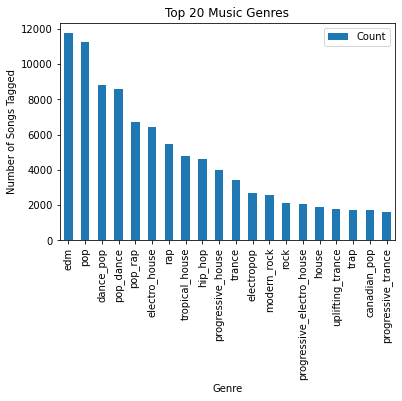

In [17]:
df.head(20).plot.bar(x='Genre')
plt.pyplot.title('Top 20 Music Genres')
plt.pyplot.xlabel('Genre')
plt.pyplot.ylabel('Number of Songs Tagged')

In [19]:
music_data.columns

Index(['release_date', 'artist', 'name', 'album', 'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms_y',
       'id', 'Values', 'tempoRange_grave', 'tempoRange_lento',
       'tempoRange_largo', 'tempoRange_adagio', 'tempoRange_andante',
       'tempoRange_moderato', 'tempoRange_algretto', 'tempoRange_allegro',
       'tempoRange_vivace', 'tempoRange_presto', 'tempoRange_prestissimo',
       'popularity_cat_1', 'popularity_cat_2', 'popularity_cat_3',
       'popularity_cat_4', 'popularity_cat_5', 'popularity_cat_6',
       'popularity_cat_7', 'popularity_cat_8', 'popularity_cat_9',
       'popularity_cat_10'],
      dtype='object')

In [20]:
music_data.dtypes[:20]

release_date         object
artist               object
name                 object
album                object
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms_y         int64
id                   object
Values               object
tempoRange_grave      uint8
dtype: object

In [21]:
music_data.drop(['popularity', 'tempo', 'key', 'mode'], axis=1, inplace=True)

In [22]:
ohe_cols = music_data.dtypes[music_data.dtypes == 'uint8'].index.values

In [23]:
float_cols = music_data.dtypes[music_data.dtypes == 'float64'].index.values

In [24]:
import datetime
music_data['Seconds']=pd.to_datetime(music_data['release_date']).map(pd.Timestamp.timestamp)

day = 60*60*24
year = 365.2425*day
music_data['year cos'] = np.cos(music_data['Seconds'] * (2*np.pi/year))
music_data.drop(columns='Seconds', inplace=True)

In [25]:
#function to build entire feature set
def create_feature_set(df, float_cols):

    #tfidf genre lists
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(df['Values'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = [i for i in tfidf.get_feature_names()]
    genre_df.reset_index(drop = True, inplace=True)


    #scale float columns
    floats = df[float_cols].reset_index(drop = True)
    one_hot_e = df[ohe_cols].reset_index(drop = True)
    year = df['year cos'].reset_index(drop = True) * 1.5
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) 

    #concanenate all features
    final = pd.concat([genre_df, floats_scaled, one_hot_e, year], axis = 1)
     
    #add song id
    final['id']=df['id'].values
    
    return final


In [26]:
features = create_feature_set(music_data, float_cols=float_cols)

In [27]:
features.set_index('id', inplace=True)


In [28]:
features

,_hip_hop,a_cappella,abstract_beats,abstract_hip_hop,acid_house,acid_rock,acid_trance,acoustic_blues,acoustic_pop,acoustic_rock,...,popularity_cat_2,popularity_cat_3,popularity_cat_4,popularity_cat_5,popularity_cat_6,popularity_cat_7,popularity_cat_8,popularity_cat_9,popularity_cat_10,year cos
id,,,,,,,,,,,,,,,,,,,,,
3egj44N2tiuW5F2MrqmBjW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.911186
1WAWbKpQe3XMp4b96bjazD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0.911186
1HFIgvDlSCjC95Ch6h6gF7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0.911186
0mEYJIIBcUt2GH4ftYKJ5Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.911186
0vQ5VW753vuqUdi4mipjVl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.911186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70GM6jmMfyZqatFGFdvjE2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,-1.146346
1hap9S6oZZG0uP0h4GoaIu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,-1.146346
4A9dJIJTDQZzkpIUqyUSxe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,-1.146346


In [29]:
from sklearn.metrics.pairwise import linear_kernel


In [30]:
cosine_sim = linear_kernel(features)

In [31]:
indices = pd.Series(music_data.index, index=music_data['id'])

In [32]:
indices

id
3egj44N2tiuW5F2MrqmBjW        0
1WAWbKpQe3XMp4b96bjazD        1
1HFIgvDlSCjC95Ch6h6gF7        2
0mEYJIIBcUt2GH4ftYKJ5Q        3
0vQ5VW753vuqUdi4mipjVl        4
                          ...  
70GM6jmMfyZqatFGFdvjE2    41445
1hap9S6oZZG0uP0h4GoaIu    41446
4A9dJIJTDQZzkpIUqyUSxe    41447
0jVG6xnJ9w6EwBqWbvGVfy    41448
3JYAnUtZh0uoMZrTnHiao2    41449
Length: 41450, dtype: int64

In [33]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:100]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return music_data['id'].iloc[movie_indices]

In [34]:
cardirecs = get_recommendations('0nkaAtNXPZJhwxuAqL2DCD', cosine_sim=cosine_sim)

In [35]:
data = pd.DataFrame(cardirecs)

In [36]:
data.head(50)

,id
40247,0nkaAtNXPZJhwxuAqL2DCD
25181,1N31Wy2PWz5HvCzMbff3mO
40245,70TJKH7M76Nw9Oakjuz1OZ
40246,7LQxFNXdpbu2w33iM5FASJ
25157,1dtpYestJ72OwmQeghIUfn
24978,68FYHHZVhTNEatQ0Q8OQWD
8915,7CRkaeghDa6C0r3RE6ExnR
31581,1qfOSlQohddqAOGl3f8snd
36863,0TMP6JdVOg8UkSbgZgtJQG
8933,1paGftYX89m3T9eL7EZpID


In [37]:
cosine_sim.shape

(41450, 41450)

In [38]:
recommender_df = pd.DataFrame(cosine_sim, columns=music_data['id'])